<h1 style="text-align:center"> Assignment CNN</h1>

<h3 style="text-align:right">-By Aryan Gupta</h3>

In [285]:
import numpy as np
import PIL
from PIL import Image

In [286]:
img = Image.open("../lord_einstein.jpg")

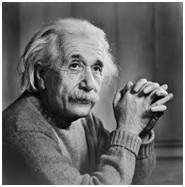

In [287]:
img

In [288]:
convert_numpy = np.array(img)
convert_numpy[5:10,5:10,1]

array([[58, 58, 71, 59, 57],
       [60, 48, 49, 56, 54],
       [58, 52, 54, 55, 53],
       [47, 50, 49, 55, 55],
       [48, 50, 50, 55, 55]], dtype=uint8)

In [289]:
convert_numpy.shape

(187, 185, 3)

In [290]:
def get_kernel(name):
    if name.lower() == "Sobel X Kernel".lower():
        kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    elif name.lower() == 'Sobel Y Kernel'.lower():
        kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    elif name.lower() == 'Gaussian Kernel'.lower(): # standard deviation = 1.4
        kernel = np.array([[2, 4, 5, 4, 2], [4, 9, 12, 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]])
        kernel = kernel/159
    else:
        raise NotImplementedError
    return kernel
def conv(image, kernel,stride = 1):
    # first I need to extract every colour of the layer seperately and form a matrix
    # in order to
    kernel = get_kernel(kernel)
    k = kernel.shape[0]
    image = np.array(image)
    W_x = image.shape[0]
    W_y = image.shape[1]
    if len(image.shape) == 3:
        dim = image.shape[2]
    else:
        dim = 1
    cover_image = np.zeros([W_x-k+1, W_y-k+1])
    for j in range(0, W_y-k+1, stride):
        for i in range(0, W_x-k+1, stride):
            sum_conv = 0
            if dim>1:
                for d in range(dim):
                    sum_conv += np.sum(np.multiply(image[i:i+k,j:j+k,d], kernel))
                    break # here I am breaking it because it is meant to be processed as a 1-D image
            else:
                sum_conv += np.sum(np.multiply(image[i:i+k,j:j+k], kernel))
            cover_image[i][j] = sum_conv
    return cover_image
cnn_image = conv(img, "Sobel X Kernel")

In [291]:
get_kernel("Gaussian Kernel")

array([[0.01257862, 0.02515723, 0.03144654, 0.02515723, 0.01257862],
       [0.02515723, 0.05660377, 0.0754717 , 0.05660377, 0.02515723],
       [0.03144654, 0.0754717 , 0.09433962, 0.0754717 , 0.03144654],
       [0.02515723, 0.05660377, 0.0754717 , 0.05660377, 0.02515723],
       [0.01257862, 0.02515723, 0.03144654, 0.02515723, 0.01257862]])

In [292]:
cnn_image

array([[-195., -165.,   18., ...,   -3.,  101.,  148.],
       [-548., -540.,  -19., ...,   65.,  320.,  328.],
       [-750., -728.,    8., ...,   73.,  468.,  441.],
       ...,
       [-665., -706.,  -51., ...,    7.,  636.,  607.],
       [-505., -506.,  -37., ...,    4.,  471.,  452.],
       [-209., -186.,   52., ...,  -70.,  138.,  221.]])

In [293]:
type(cnn_image)

numpy.ndarray

In [294]:
# checking the implementation
smoothened = conv(img, 'Gaussian Kernel')
sobel_x =  conv(smoothened, 'Sobel X Kernel')
sobel_y = conv(smoothened, 'Sobel Y Kernel')

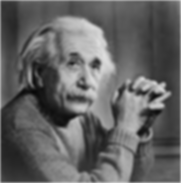

In [295]:
img1 = PIL.Image.fromarray(np.uint8(smoothened))
img1

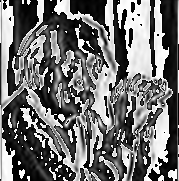

In [296]:
img2 = PIL.Image.fromarray(np.uint8(conv(smoothened, 'Sobel X Kernel')))
img2

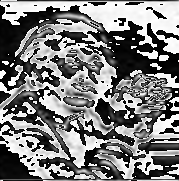

In [297]:
img2 = PIL.Image.fromarray(np.uint8(conv(smoothened, 'Sobel Y Kernel')))
img2

In [298]:
print(f"Dimensions of sobel_x are {sobel_x.shape}")
print(f"Dimensions of sobel_y are {sobel_y.shape}")

Dimensions of sobel_x are (181, 179)
Dimensions of sobel_y are (181, 179)


In [299]:
gradient = np.sqrt(sobel_x**2 + sobel_y**2)

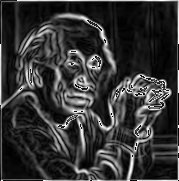

In [300]:
img_result = PIL.Image.fromarray(np.uint8(gradient))
img_result

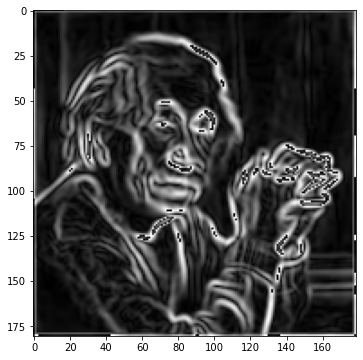

In [301]:
import matplotlib.pyplot as plt
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
plot_image(img_result)